Version 2.1.1
* padronização nome do arquivo de leitura df_thai_limpo.xlsx

# Projeto Thai House
* Gráficos descritivos, visando entender o negócio e criar métricas para desenvolvimento.
* Dados anteriores a Abril de 2022, não possuem confiabilidade de precisão e veracidade.
* Dados a partir de Abril de 2022 são confiáveis, tem método, veracidade e precisão.

### Import

In [126]:
# bibliotecas
import locale
from datetime import date
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# Graf na tela
%matplotlib inline

In [127]:
# Plotly themes
# seaborn, plotly_white, simple_white, plotly, plotly_dark, ggplot2, none

pio.templates.default = 'plotly_white'

px.defaults.template = 'plotly_white'
px.defaults.color_continuous_scale = px.colors.sequential.Blackbody
px.defaults.width = 800
px.defaults.height = 600

#### Format number

In [128]:
def format_number(num):
    '''Troca ponto por vírgula, formato pt_BR e inclui casa do milhar'''
    return '{:,.2f}'.format(num).replace(',', ';').replace('.', ',').replace(';', '.')


pd.options.display.float_format = format_number

#### Set Locale

In [129]:
locale.setlocale(locale.LC_ALL, 'pt_BR')

'pt_BR'

#### Leitura dados

In [130]:
df = pd.read_excel('./dados/df_thai_final.xlsx')

In [131]:
df.tail()

,data_contato,etapa,situação,data_evento,tipo,num_convidados,cardápio,preço,sinal,valor_extra,...,kids,preço_kids,qtde_conv_final,empresa,contato,telefone,email,valor_total,total_convidados,saldo_restante
368,2023-01-24,Não fechado,Fará uma viagem,2023-08-12,Formatura,"50,00",Menu Não Informado,"255,00","0,00","0,00",...,"0,00","0,00","0,00",Milena moni,Nan,51-99153.8286,Nan,"12.750,00","50,00","12.750,00"
369,2023-01-09,Em negociação,Encaminhado orçamento,2023-08-15,Jantar com palestra e welcome drink,"100,00",Menu Não Informado,"255,00","0,00","0,00",...,"0,00","0,00","0,00",Bruna martinez,Bruna martinez,Nan,Producao05.bistro@gmail.com,"25.500,00","100,00","25.500,00"
370,2023-03-02,Em negociação,Não informado,2023-09-23,Casamento,"50,00",Menu Não Informado,"255,00","0,00","0,00",...,"0,00","0,00","0,00",Solange azambuja,Solange azambuja,5199155-3410,Nan,"12.750,00","50,00","12.750,00"
371,2023-03-24,Em negociação,Orçamento encaminhado,2023-12-14,Jantar,"120,00",Menu Não Informado,"255,00","0,00","0,00",...,"0,00","0,00","0,00",Carla barella,Carla barella,Nan,Carla.barella@cleepar.com.br,"30.600,00","120,00","30.600,00"
372,2023-03-10,Em negociação,Orçamento encaminhado,2024-01-19,Formatura,"30,00",Menu Não Informado,"255,00","0,00","0,00",...,"0,00","0,00","0,00",Fernanda lessa,Fernanda lessa,51-99115-6505,Nan,"7.650,00","30,00","7.650,00"


### Types

In [132]:
df.dtypes

data_contato        datetime64[ns]
etapa                       object
situação                    object
data_evento         datetime64[ns]
tipo                        object
num_convidados             float64
cardápio                    object
preço                      float64
sinal                      float64
valor_extra                float64
forma_pag                   object
observação                  object
kids                       float64
preço_kids                 float64
qtde_conv_final            float64
empresa                     object
contato                     object
telefone                    object
email                       object
valor_total                float64
total_convidados           float64
saldo_restante             float64
dtype: object

In [133]:
inteiros = ['num_convidados', 'kids', 'qtde_conv_final', 'total_convidados']

df[inteiros] = df[inteiros].astype('int16')

### Cálculos

In [134]:
valor_total_mediano = df['valor_total'].median()
print(valor_total_mediano)

6720.0


### Criação das Etapas em categorias

In [135]:
df['etapa'] = df.etapa.astype('category')
# df.etapa.unique()

In [136]:
# Criando código para coluna categórica e incluindo coluna no dataframe
df.insert(2, 'cod_etapa', df['etapa'].cat.codes)

### Organização das datas

In [137]:
# Criando colunas:
#        DataFrame.insert(loc, column, value, allow_duplicates=False)
# df.insert(1, 'ano_evento', df.data_evento.dt.year)
# df.insert(2, 'mes_evento', df.data_evento.dt.month_name())
# df.insert(3, 'dia_semana', df.data_evento.dt.day_name())

# Convertendo direto para português, precisa utilizar locale.setlocale
df.insert(1, 'ano_evento', df.data_evento.dt.strftime('%Y'))
df.insert(2, 'mes_evento', df.data_evento.dt.strftime('%b'))
df.insert(3, 'dia_semana', df.data_evento.dt.strftime('%A'))

# df['ano_evento'] = df['data_evento'].dt.year
# df['mes_evento'] =  df['data_evento'].dt.month_name()

In [138]:
df.head(2)

,data_contato,ano_evento,mes_evento,dia_semana,etapa,cod_etapa,situação,data_evento,tipo,num_convidados,...,kids,preço_kids,qtde_conv_final,empresa,contato,telefone,email,valor_total,total_convidados,saldo_restante
0,2018-01-19,2018,jan,sexta,Não fechado,2,Não informado,2018-01-19,Formatura,30,...,0,"0,00",0,Nan,Nan,Nan,Nan,"6.570,00",30,"6.570,00"
1,2018-01-26,2018,jan,sexta,Não fechado,2,Não informado,2018-01-26,Formatura,70,...,0,"0,00",0,Nan,Nan,Nan,Nan,"15.330,00",70,"15.330,00"


In [139]:
df['ano_evento'] = df.ano_evento.astype('int16')

### Visão completa do DataFrame - Gráficos

In [140]:
df_qtde_eventos = df.groupby(df['ano_evento']).count()
# df_qtde_eventos.filter(['data_evento'])

In [141]:
df_qtde_eventos.mes_evento

ano_evento
2018     49
2019    108
2020     30
2021      1
2022    118
2023     66
2024      1
Name: mes_evento, dtype: int64

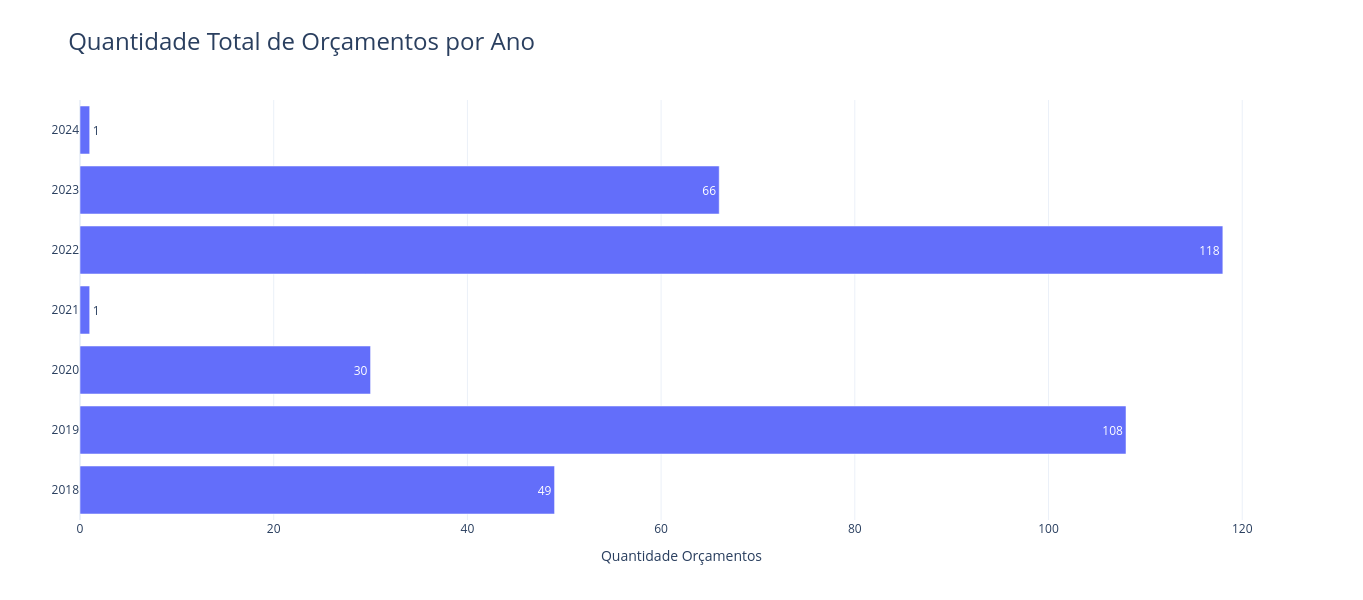

In [142]:
fig = px.bar(
    df_qtde_eventos,
    x='num_convidados',
    title='Quantidade Total de Orçamentos por Ano',
    text_auto=True,
    labels={
        'num_convidados': 'Quantidade Orçamentos',
        'ano_evento': 'Ano Evento'})
fig.update_layout(title_font_size=24)
fig.update_yaxes(title=None)

fig.show()
fig.write_html(
    r'./graficos/qtde_orçamentos.html')

In [143]:
# Valor total orçado por ano
valor_ano = df[['valor_total', 'ano_evento']].groupby('ano_evento').sum()
# valor_ano

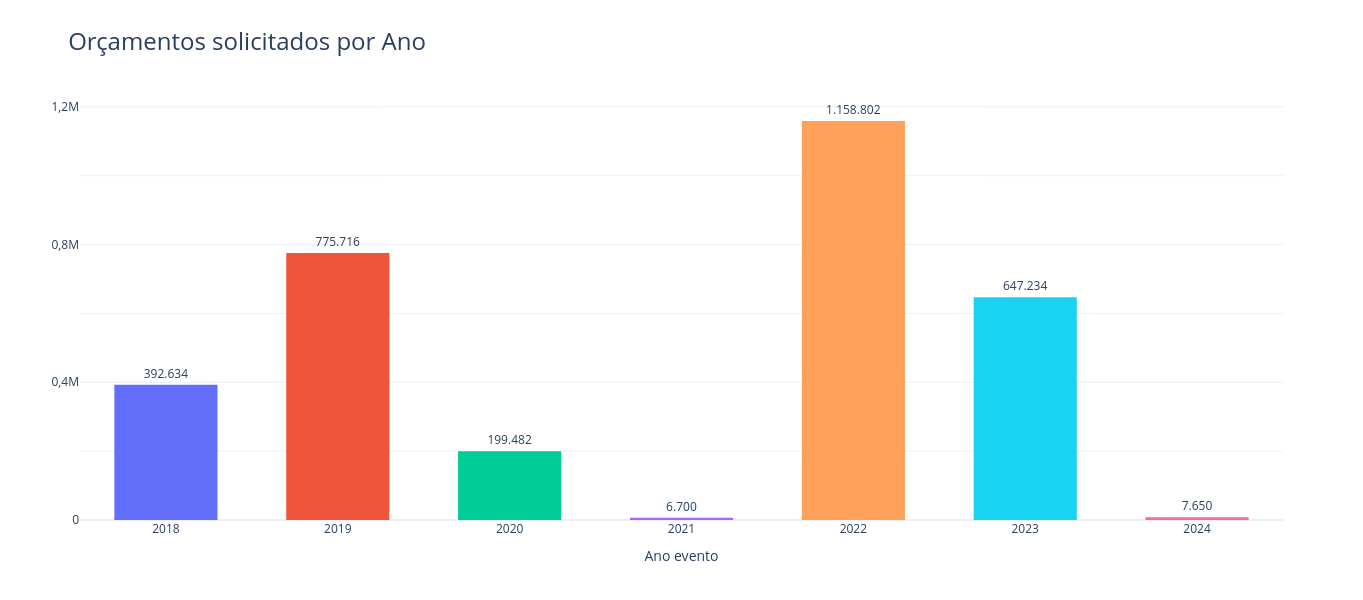

In [144]:
# fig = px.bar(df, x='ano_evento', y='valor_total', color='smoker', barmode='group')
fig = px.histogram(
    df,
    x='ano_evento',
    y='valor_total',
    text_auto=True,
    title='Orçamentos solicitados por Ano',
    labels={
        'valor_total': 'Orçamentos',
        'ano_evento': 'Ano evento'
    },
    color='ano_evento',
)
fig.update_yaxes(title=None, ticklabelstep=2, showticklabels=True)
fig.update_layout(bargap=0.4, separators=',.', title_font_size=24)
fig.update_traces(texttemplate='%{y:,.0f}', textposition='outside')
fig.update_layout(showlegend=False)

# 'Price: %{y:$.2f} syntax %{variable:d3-format}'

fig.show()
fig.write_html(
     r'./graficos/valor_total_orçado.html')

In [145]:
df.loc[:, ['valor_total', 'total_convidados']]

,valor_total,total_convidados
0,"6.570,00",30
1,"15.330,00",70
2,"17.520,00",80
3,"6.789,00",31
4,"21.450,00",78
...,...,...
368,"12.750,00",50
369,"25.500,00",100
370,"12.750,00",50
371,"30.600,00",120


## Analise de dados Ano Atual

In [146]:
currentDate = date.today()
year = currentDate.year

In [147]:
type(year)

int

In [148]:
# Filtro
df_ano_atual = df[df['ano_evento'] == year]
df_fut = df[df['ano_evento'] > year]

In [149]:
df_ano_atual.tail()

,data_contato,ano_evento,mes_evento,dia_semana,etapa,cod_etapa,situação,data_evento,tipo,num_convidados,...,kids,preço_kids,qtde_conv_final,empresa,contato,telefone,email,valor_total,total_convidados,saldo_restante
367,2023-03-13,2023,ago,sábado,Em negociação,0,Encaminhado orçamento,2023-08-12,Evento social,60,...,0,"0,00",0,Eliane carvalho,Eliane carvalho,51-996456696,Nan,"15.300,00",60,"15.300,00"
368,2023-01-24,2023,ago,sábado,Não fechado,2,Fará uma viagem,2023-08-12,Formatura,50,...,0,"0,00",0,Milena moni,Nan,51-99153.8286,Nan,"12.750,00",50,"12.750,00"
369,2023-01-09,2023,ago,terça,Em negociação,0,Encaminhado orçamento,2023-08-15,Jantar com palestra e welcome drink,100,...,0,"0,00",0,Bruna martinez,Bruna martinez,Nan,Producao05.bistro@gmail.com,"25.500,00",100,"25.500,00"
370,2023-03-02,2023,set,sábado,Em negociação,0,Não informado,2023-09-23,Casamento,50,...,0,"0,00",0,Solange azambuja,Solange azambuja,5199155-3410,Nan,"12.750,00",50,"12.750,00"
371,2023-03-24,2023,dez,quinta,Em negociação,0,Orçamento encaminhado,2023-12-14,Jantar,120,...,0,"0,00",0,Carla barella,Carla barella,Nan,Carla.barella@cleepar.com.br,"30.600,00",120,"30.600,00"


### Criação etapas ano atual

In [150]:
df_ano_atual = df_ano_atual.drop(columns='cod_etapa')

In [151]:
df_ano_atual['etapa'] = df_ano_atual.etapa.astype('str')

In [152]:
df_ano_atual['etapa'] = df_ano_atual.etapa.astype('category')
# df_ano_atual.etapa.unique()

### Criação códigos da categoria

In [153]:
df_ano_atual.insert(5, 'cod_etapa', df['etapa'].cat.codes)
# df_ano_atual.head()

In [154]:
df_ano_atual.etapa.unique()

['Realizado', 'Não fechado', 'Fechado', 'Em negociação']
Categories (4, object): ['Em negociação', 'Fechado', 'Não fechado', 'Realizado']

### Criação etapas Futuras

In [155]:
df_fut = df_fut.drop(columns='cod_etapa')

In [156]:
df_fut['etapa'] = df_fut.etapa.astype('str')

In [157]:
df_fut['etapa'] = df_fut.etapa.astype('category')
# df_fut.etapa.unique()

### Criação códigos da categoria

In [158]:
df_fut.insert(5, 'cod_etapa', df['etapa'].cat.codes)
# df_fut.head()

In [159]:
df_fut.etapa.unique()

['Em negociação']
Categories (1, object): ['Em negociação']

## Gráficos Análise Ano Atual

In [160]:
# Removendo warning
# pd.set_option('mode.chained_assignment', None) # 'warn' | 'raise' | None

In [161]:
# df_ano_atual.query('etapa == "Não fechado"')

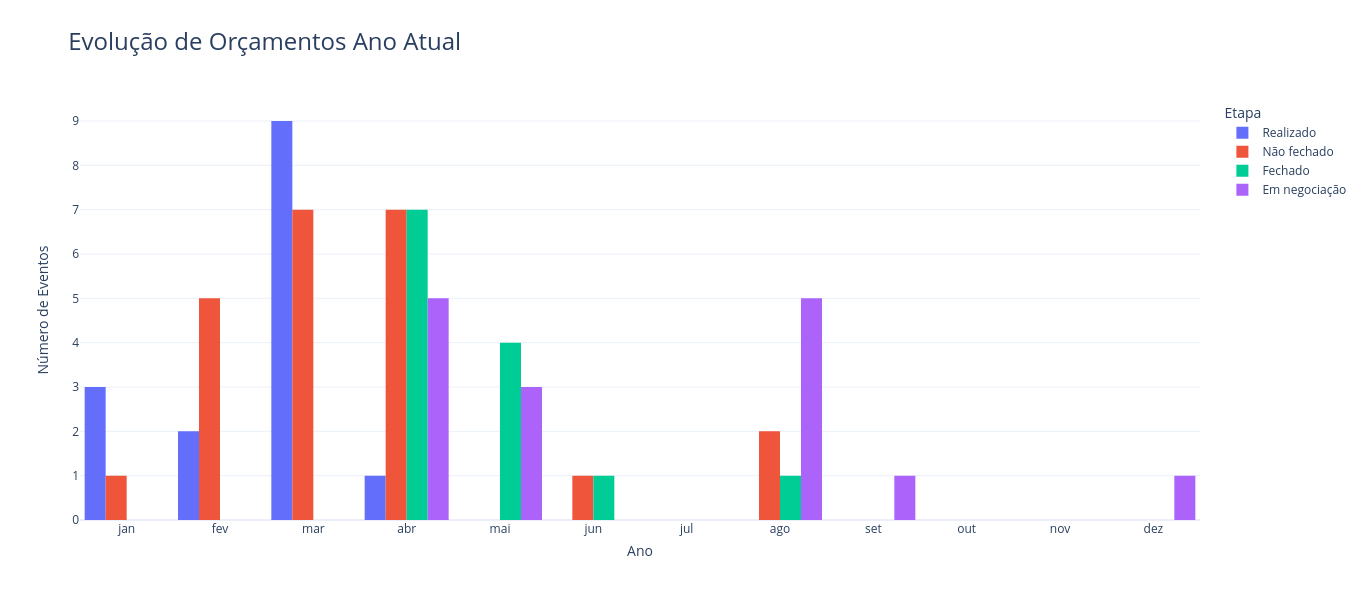

In [162]:
fig = px.histogram(
    df_ano_atual,
    x='mes_evento',
    labels={
        'mes_evento': 'Ano',
        'count': 'Quantidade de Eventos',
        'etapa': 'Etapa'},
    text_auto=False,
    color='etapa',
    barmode='group',
    title='Evolução de Orçamentos Ano Atual')

fig.update_yaxes(
    title='Número de Eventos',
    title_font={'size': 14},
    ticklabelstep=1,
    showticklabels=True)

fig.update_xaxes(
    title_font={'size': 14},
    title_standoff=10,
    categoryarray=(
        'jan',
        'fev',
        'mar',
        'abr',
        'mai',
        'jun',
        'jul',
        'ago',
        'set',
        'out',
        'nov',
        'dez'))

fig.update_layout(title_font_size=24, bargap=0.1)

fig.show()
fig.write_html(r'./graficos/orç_ano.html')

In [163]:
# df_filtro = df.query('data_evento >= "2022/04"')
df_ano_atual[['data_evento', 'etapa']].groupby(['etapa']).count()

,data_evento
etapa,
Em negociação,15
Fechado,13
Não fechado,23
Realizado,15


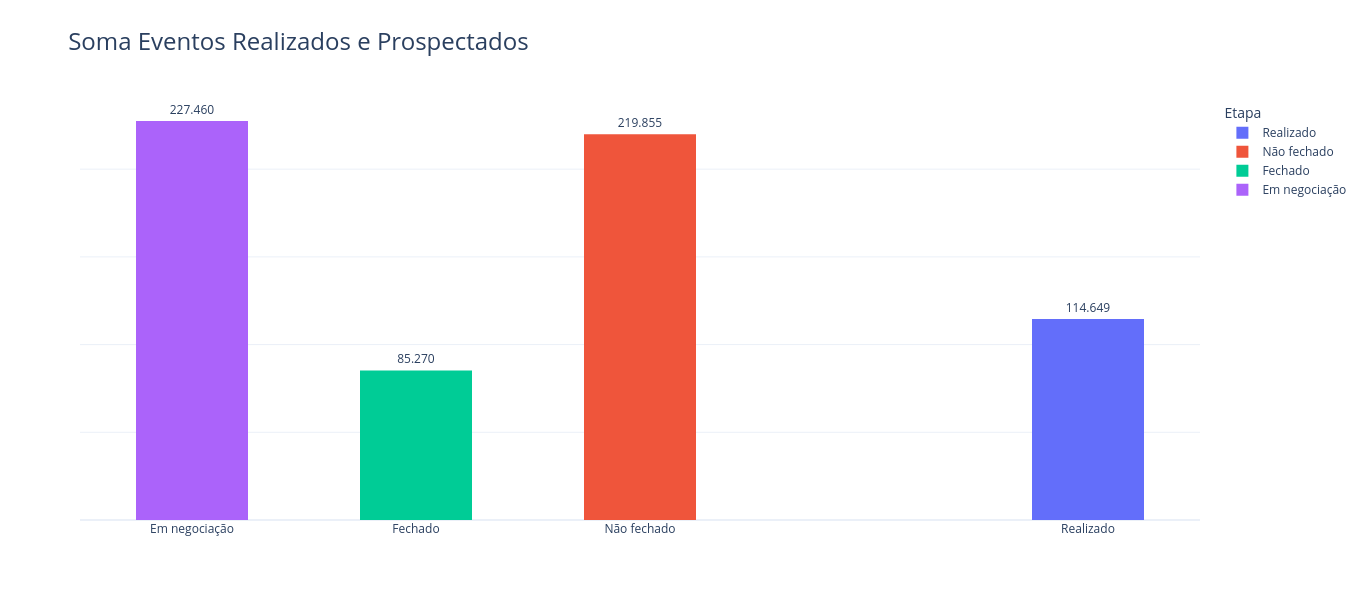

In [164]:
# df_ano_atual.query("data_evento >= '2022/04' and etapa == 'Realizado'")

fig = px.histogram(
    df_ano_atual,
    x='cod_etapa',
    y='valor_total',
    color='etapa',
    text_auto=True,
    title='Soma Eventos Realizados e Prospectados',
    labels={'etapa': 'Etapa'},
)

fig.update_yaxes(title=None, ticklabelstep=1, showticklabels=False)
fig.update_xaxes(title=None,
                 title_font={'size': 10},
                 title_standoff=10,
                 showticklabels=True)
fig.update_layout(title_font_size=24, bargap=0.5, separators=',.')
fig.update_traces(texttemplate='%{y:,.0f}', textposition='outside')

fig.update_layout()
fig.update_xaxes(ticktext=df_ano_atual.etapa, tickvals=df_ano_atual.cod_etapa)
# fig.update_traces(name= 'etapa', visible=True, selector=dict(type='histogram'))

fig.show()
fig.write_html(r'./graficos/eventos_ano_atual.html')

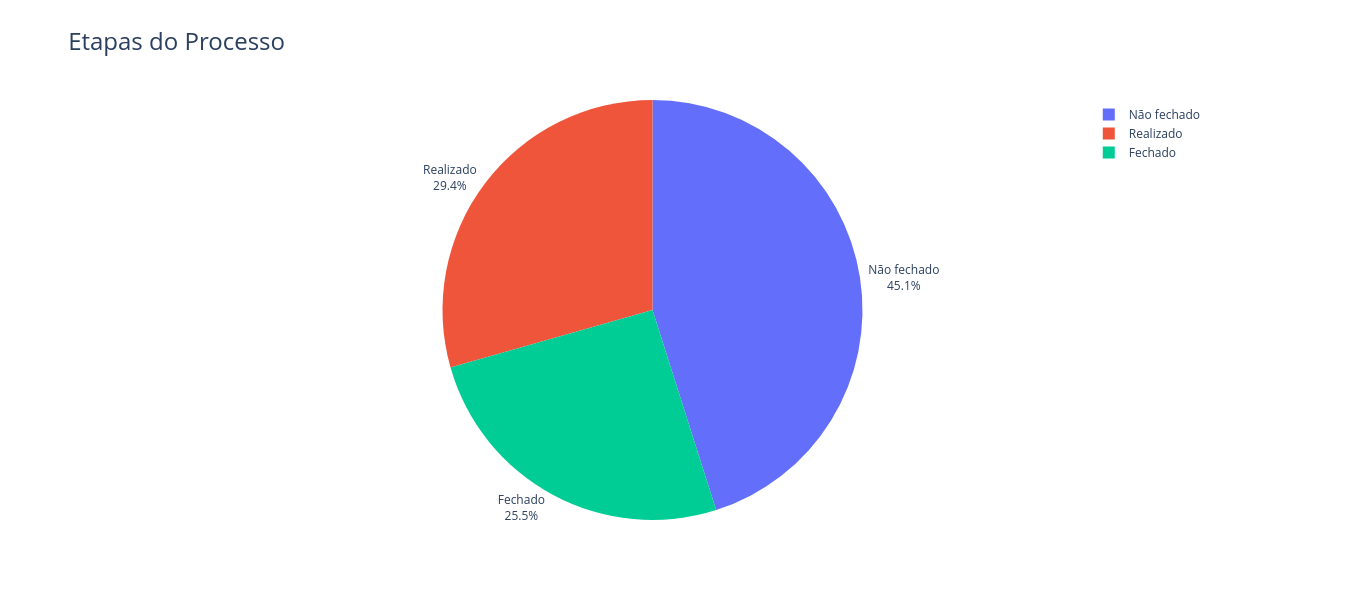

In [165]:
etapa = df_ano_atual.query(
    'etapa == "Não fechado" or etapa == "Fechado" or etapa == "Realizado"')
fig = px.pie(etapa, 'etapa', title='Etapas do Processo ')
fig.update_layout(title_font_size=24)
fig.update_traces(textposition='outside', textinfo='percent+label')
# fig.update_layout(title_font_size=24, bargap=0.2)

fig.show()
fig.write_html(r'./graficos/etapas_processo.html')

In [166]:
# df_ano_atual.columns.values

In [167]:
# df_ano_atual.dia_semana.sort_values(axis=0, ascending=False)

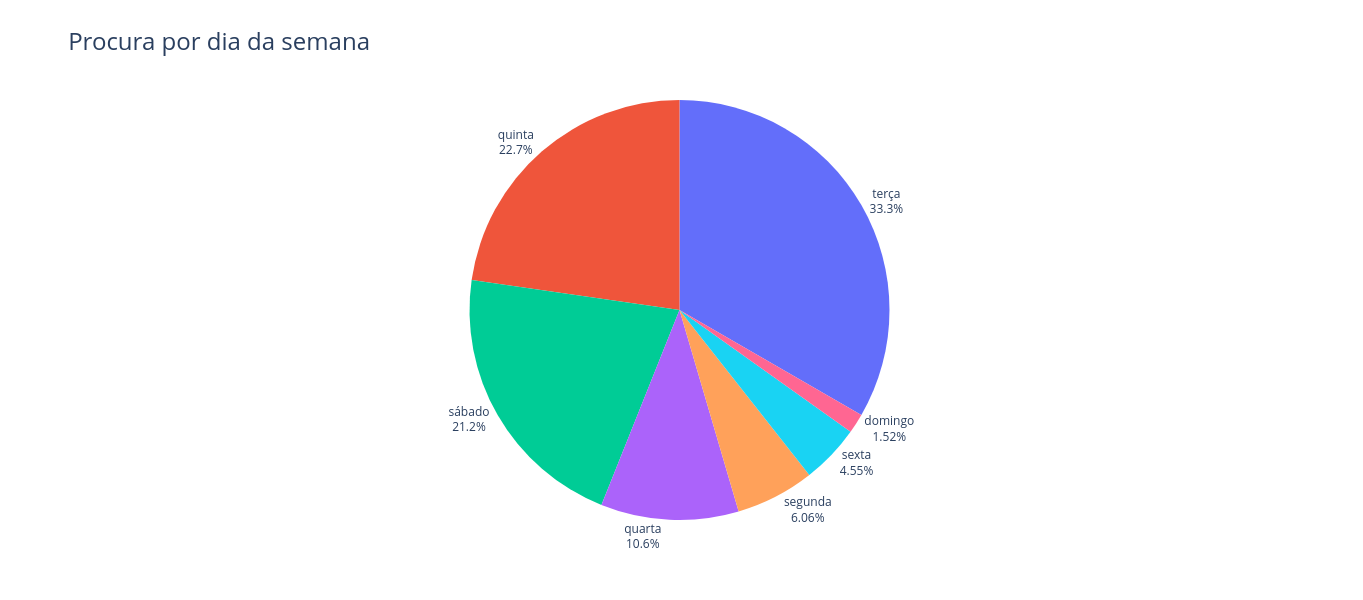

In [168]:
# etapa = df_ano_atual.query('etapa == "Não fechado" or etapa == "Fechado" or etapa == "Realizado"')
fig = px.pie(df_ano_atual, 'dia_semana', title='Procura por dia da semana')
fig.update_layout(title_font_size=24)
fig.update_traces(textposition='outside', textinfo='percent+label')
# fig.update_layout(title_font_size=24, bargap=0.2)
fig.update_layout(showlegend=False)

fig.show()
fig.write_html(r'./graficos/dist_dia_semana.html')

In [169]:
# df_ano_atual.tail(2)

In [170]:
df_realizado = df.query('etapa == "Realizado" & ano_evento > 2021')

In [171]:
# df_realizado

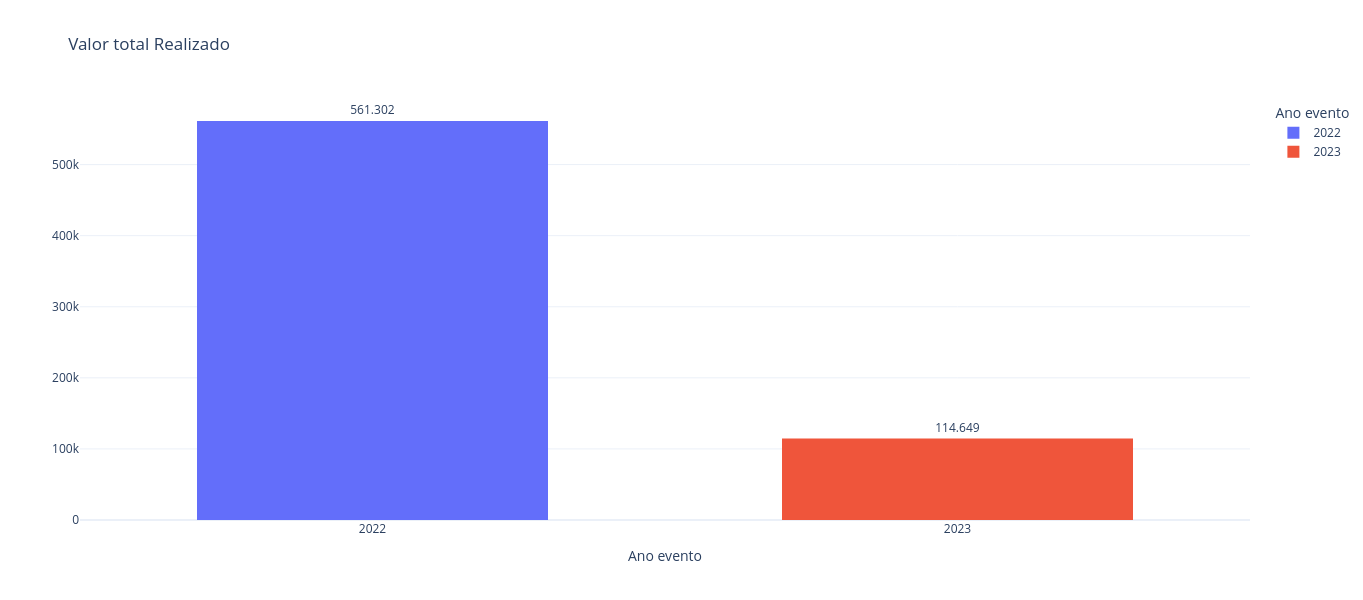

In [172]:
# fig = px.bar(df, x="ano_evento", y="valor_total", color="smoker", barmode="group")
fig = px.histogram(
    df_realizado,
    x='ano_evento',
    y='valor_total',
    text_auto=True,
    title='Valor total Realizado',
    labels={
        'valor_total': 'Orçamentos',
        'ano_evento': 'Ano evento'
        },
    color='ano_evento')

fig.update_xaxes(ticklabelstep=2)
fig.update_yaxes(title=None, ticklabelstep=1, showticklabels=True)
fig.update_layout(bargap=0.4, separators=',.')
fig.update_traces(texttemplate='%{y:,.0f}', textposition='outside')
fig.update_layout(showlegend=True)

# "Price: %{y:$.2f} syntax %{variable:d3-format}"

fig.show()
fig.write_html(r'./graficos/faturamento_ano.html')

In [173]:
negociacao = df.loc[:, [
    'etapa',
    'total_convidados',
    'data_evento',
    'valor_total']].query(
    '(etapa == "Em negociação") and (data_evento >= @year)')
negociacao.sort_values('data_evento', inplace=True)
negociacao['data_evento'] = negociacao.data_evento.dt.strftime('%x')
negociacao.loc['Total'] = negociacao.sum(numeric_only=True)
negociacao['etapa'] = negociacao.etapa.astype(str).replace('nan', '')
negociacao.fillna('', inplace=True)
# negociacao

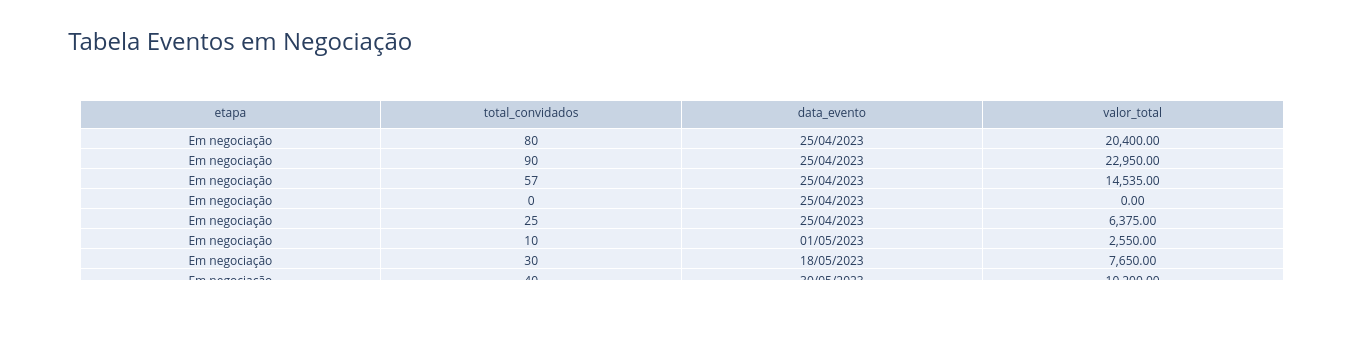

In [174]:
fig = go.Figure(data=[
    go.Table(
        header=dict(values=list(negociacao.columns)),
        cells=dict(values=[
                negociacao.etapa,
                negociacao.total_convidados,
                negociacao.data_evento,
                negociacao.valor_total
                ]),
        )
    ])
fig.update_layout(title='Tabela Eventos em Negociação',
                  title_font_size=24)
fig.update_traces(cells_format=[[None], [None], [None], [',.2f']])


fig.show()
fig.write_html(r'./graficos/tabela_em_negociação.html')

In [175]:
fechado = df.loc[:,
                 ['etapa', 'total_convidados',
                  'data_evento', 'valor_total']].query(
    '(etapa == "Fechado") and (data_evento >= @year)')
fechado['data_evento'] = fechado.data_evento.dt.strftime('%x')
fechado.loc['Total'] = fechado.sum(numeric_only=True)
fechado['etapa'] = fechado.etapa.astype(str)
fechado = fechado.fillna('', axis=0)
fechado.etapa.replace('nan', '', inplace=True)
# fechado

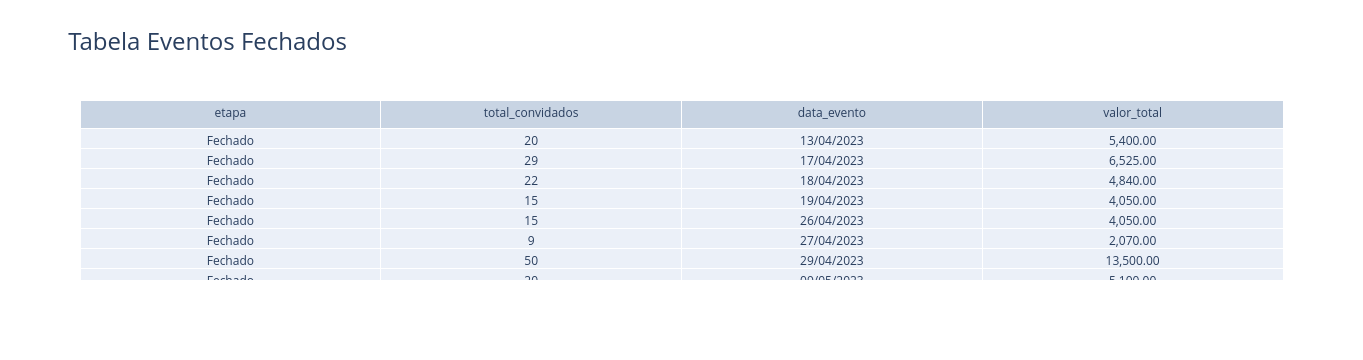

In [176]:
fig = go.Figure(data=[
    go.Table(
        header=dict(
            values=list(fechado.columns)),
        cells=dict(
            values=[
                fechado.etapa,
                fechado.total_convidados,
                fechado.data_evento,
                fechado.valor_total])
    )
])
fig.update_layout(title='Tabela Eventos Fechados', title_font_size=24)
fig.update_traces(cells_format=[[None], [None], [None], [',.2f']])

fig.show()
fig.write_html(
     r'./graficos/Tabela_fechado.html')

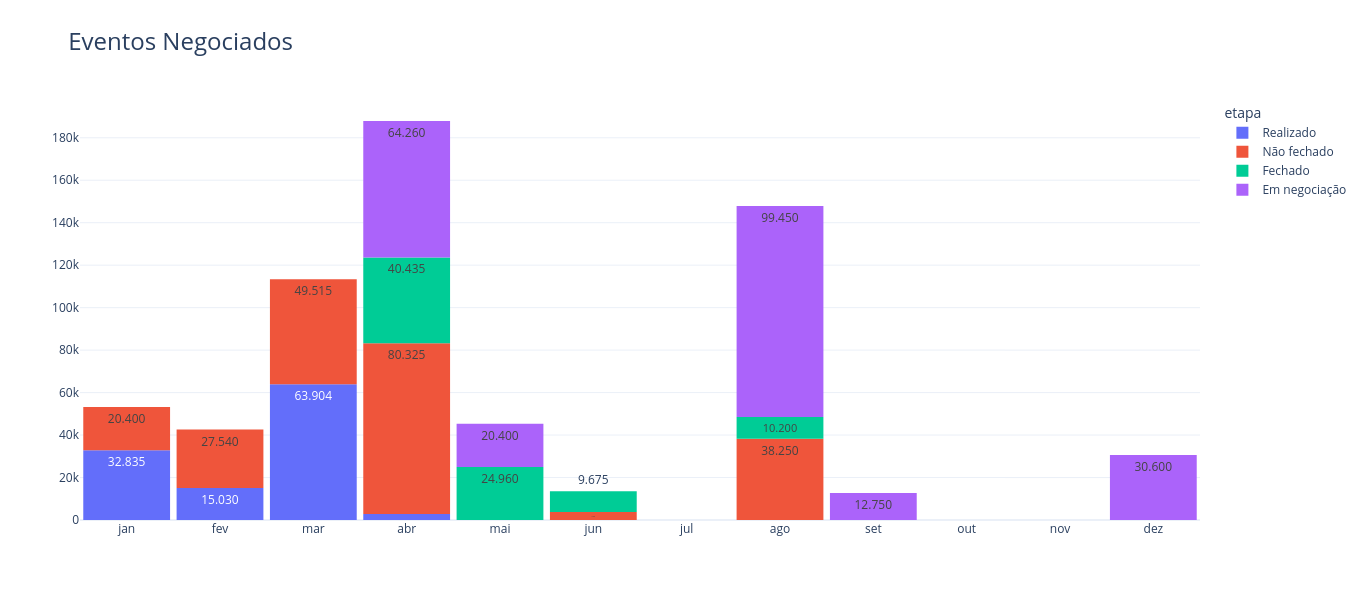

In [177]:
# negociacao = df_ano_atual[(df_ano_atual['etapa'] != 'Realizado') & (df_ano_atual['etapa'] != 'Fechado')]
fig = px.histogram(
    df_ano_atual,
    x='mes_evento',
    y='valor_total',
    text_auto=True,
    title='Eventos Negociados',
    color='etapa',
    labels={'mes_evento': 'Mês Evento'},
    )

fig.update_yaxes(title=None, ticklabelstep=1, showticklabels=True)
fig.update_xaxes(
    title=None,
    title_standoff=10,
    categoryarray=(
        'jan',
        'fev',
        'mar',
        'abr',
        'mai',
        'jun',
        'jul',
        'ago',
        'set',
        'out',
        'nov',
        'dez',
        ),
    )
fig.update_layout(title_font_size=24, bargap=0.07, separators=',.')
fig.update_traces(texttemplate='%{y:,.0f}')

fig.show()
fig.write_html(r'./graficos/eventos_negociados_ano.html')

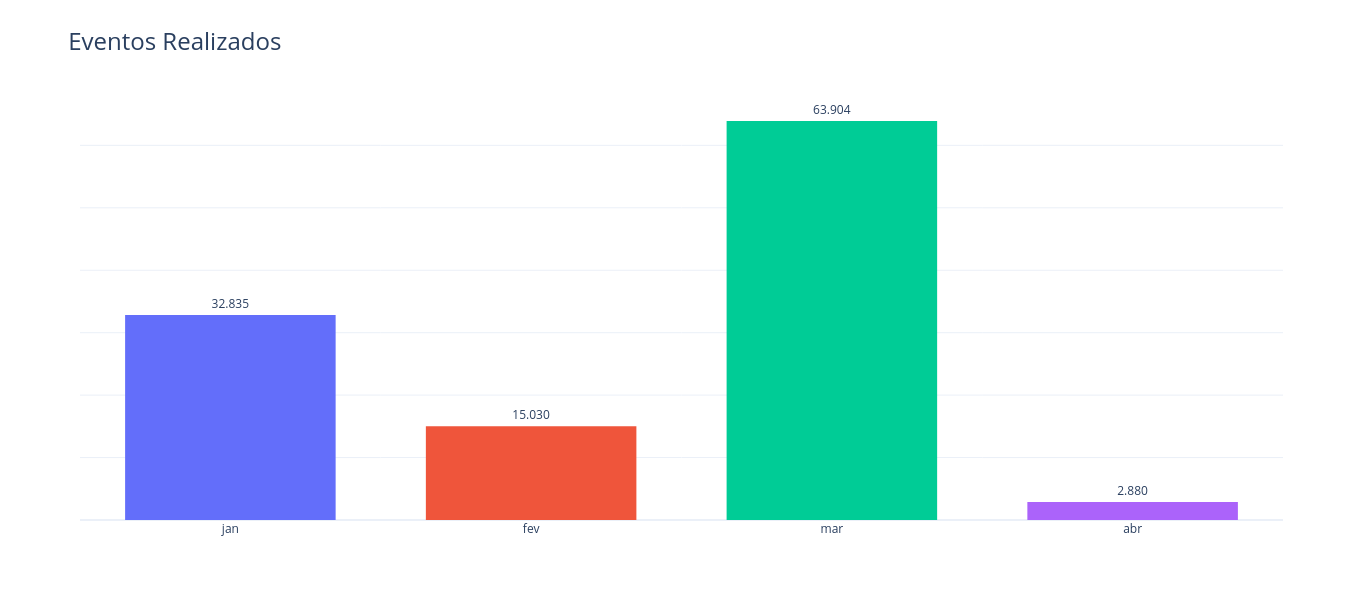

In [178]:
fat = df_ano_atual[df_ano_atual['etapa'] == 'Realizado']
fig = px.histogram(
    fat,
    x='mes_evento',
    y='valor_total',
    text_auto=True,
    title='Eventos Realizados',
    color='mes_evento',
    labels={'mes_evento': 'Mês Evento'},
    )

fig.update_yaxes(title=None, ticklabelstep=2, showticklabels=False)
fig.update_xaxes(title=None, title_font={'size': 20}, title_standoff=10)
fig.update_layout(title_font_size=24, bargap=0.3, separators=',.')
fig.update_traces(texttemplate='%{y:,.0f}', textposition='outside')
fig.update_layout(showlegend=False)

fig.show()
fig.write_html(r'./graficos/eventos_realizados.html')

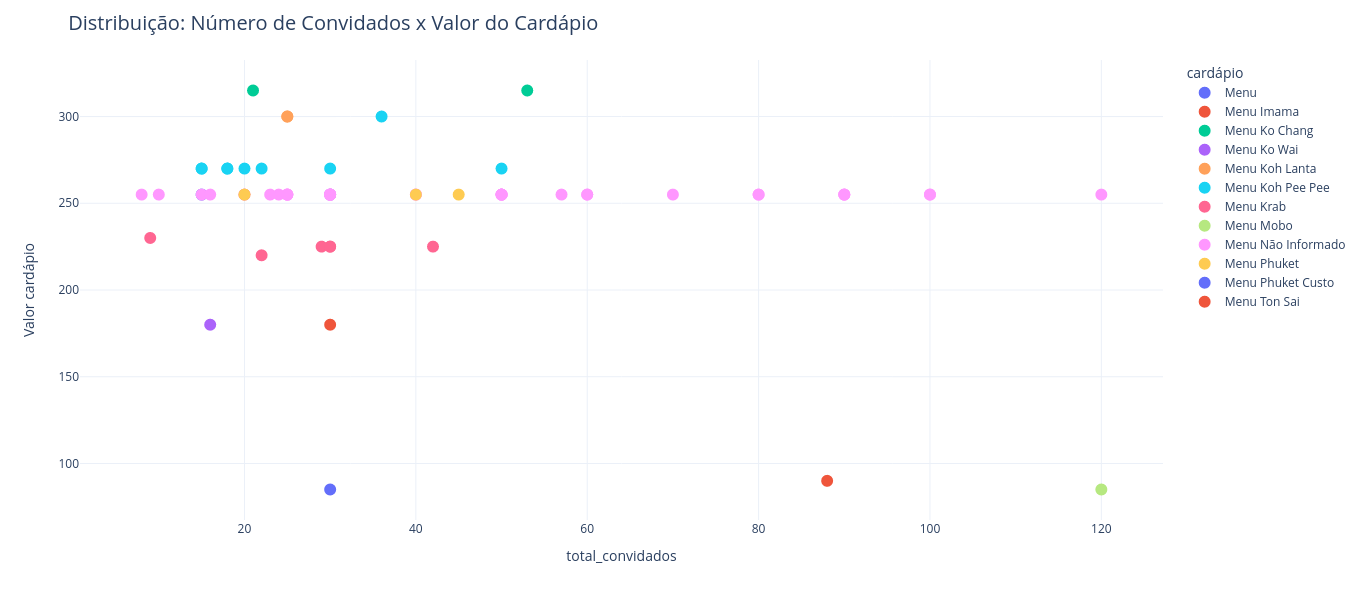

In [179]:
fig = px.scatter(
    df_ano_atual.query('valor_total > 0 and preço > 0').sort_values(
        by='cardápio'),
    x='total_convidados',
    y='preço',
    labels={
        'preço': 'Valor cardápio',
        'qtde_conv_final': 'Quantidade de convidados',
        },
    color='cardápio',
    size='valor_total',
    )
fig.update_layout(
    title='Distribuição: Número de Convidados x Valor do Cardápio',
    title_font_size=20,
    )
fig.update_traces(marker_size=12)

fig.show()
fig.write_html(r'./graficos/num_convidados_valor_cardápio.html')

In [180]:
media_convidados = round(df_ano_atual['total_convidados'].mean())
print(f'Quantidade média de convidados: {media_convidados}')

Quantidade média de convidados: 40


In [181]:
mediana_convidados = round(df_ano_atual['total_convidados'].median())
print(f'Quantidade mediana de convidados: {mediana_convidados}')

Quantidade mediana de convidados: 30


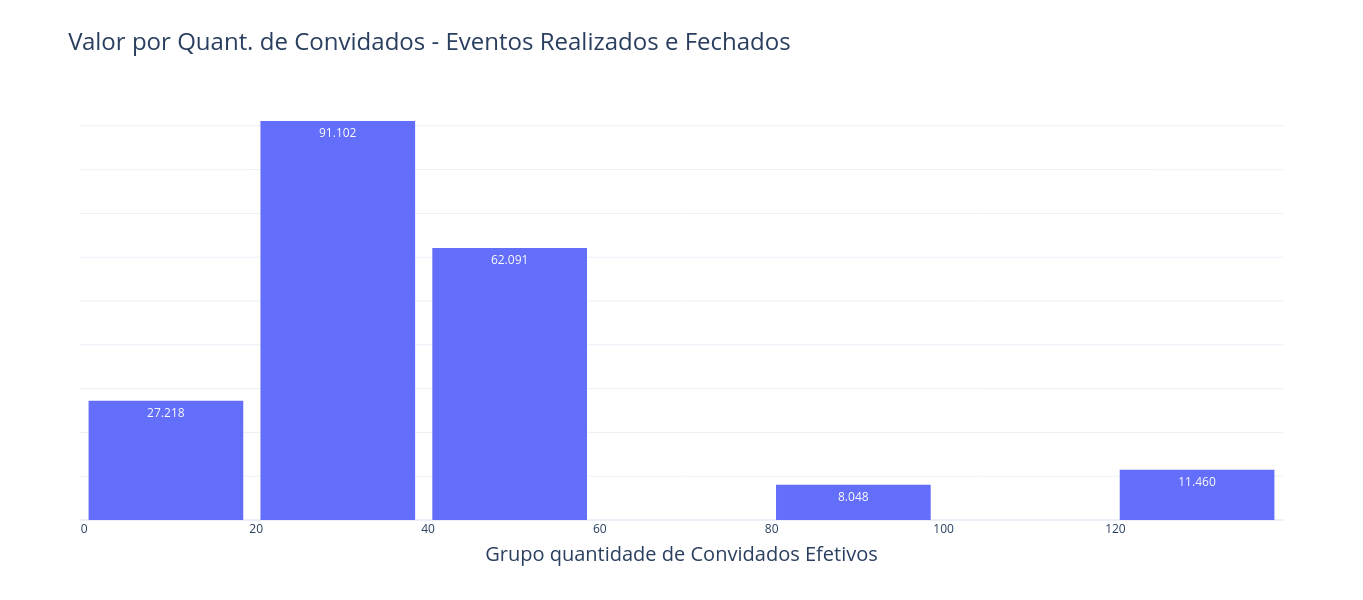

In [182]:
fig = px.histogram(
    df_ano_atual.query(
        "valor_total > 0 and total_convidados > 0 & etapa != 'Em negociação' & etapa != 'Não fechado'"
        ),
    x='total_convidados',
    y='valor_total',
    text_auto=True,
    title='Valor por Quant. de Convidados - Eventos Realizados e Fechados',
    labels={
        'valor_total': 'Valor acumulado',
        'total_convidados': 'Quantidade de convidados',
        },
    barmode='relative',
    nbins=10,
    )

fig.update_yaxes(title=None, ticklabelstep=2, showticklabels=False)
fig.update_xaxes(
    title='Grupo quantidade de Convidados Efetivos',
    title_font={'size': 20},
    title_standoff=10,
    )
fig.update_layout(title_font_size=24, bargap=0.1, separators=',.')
fig.update_traces(texttemplate='%{y:,.0f}')
# fig.update_traces(nbinsx=<VALUE>, selector=dict(type='histogram'))

fig.show()
fig.write_html(
     r'./graficos/valor_qtde_pessoas.html')

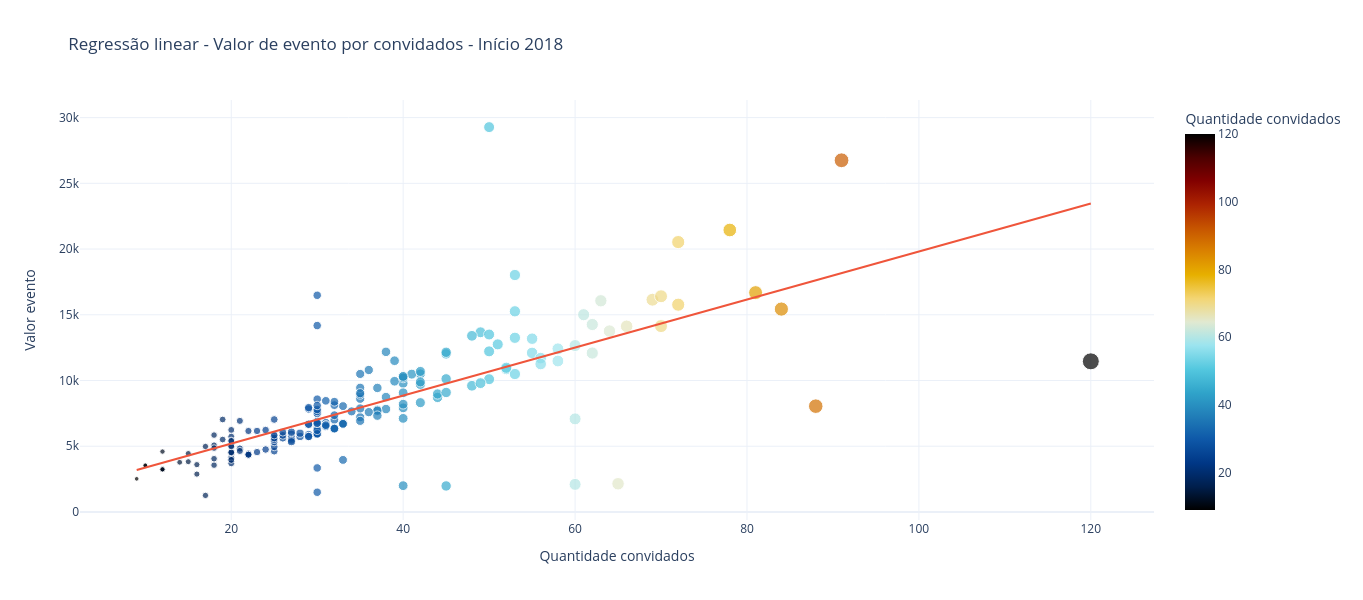

In [183]:
fig = px.scatter(
    df.query(
        "total_convidados > 0 and valor_total > 0 & etapa == 'Realizado' "),
    x='total_convidados',
    y='valor_total',
    trendline='ols',
    labels={
        'total_convidados': 'Quantidade convidados',
        'valor_total': 'Valor evento',
        },
    title='Regressão linear - Valor de evento por convidados - Início 2018',
    color='total_convidados',
    size='total_convidados',
    size_max=12,
    color_continuous_scale=px.colors.cyclical.IceFire,
    )
fig.show()
fig.write_html(r'./graficos/regressão_linear.html')

## Gráficos Análise próximo Ano

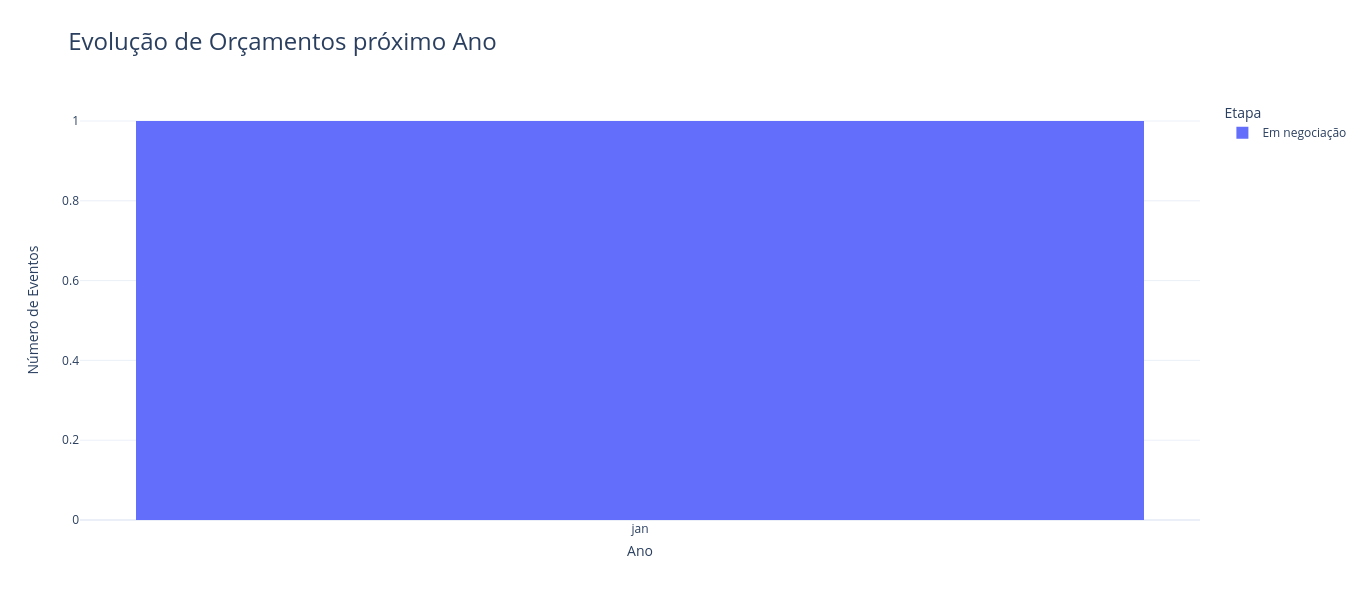

In [184]:
fig = px.histogram(
    df_fut,
    x='mes_evento',
    labels={
        'mes_evento': 'Ano',
        'count': 'Quantidade de Eventos',
        'etapa': 'Etapa'},
    text_auto=False,
    color='etapa',
    barmode='group',
    title='Evolução de Orçamentos próximo Ano')

fig.update_yaxes(
    title='Número de Eventos',
    title_font={'size': 14},
    ticklabelstep=1,
    showticklabels=True)

fig.update_xaxes(
    title_font={'size': 14},
    title_standoff=10,
    categoryarray=(
        'jan',
        'fev',
        'mar',
        'abr',
        'mai',
        'jun',
        'jul',
        'ago',
        'set',
        'out',
        'nov',
        'dez'))

fig.update_layout(title_font_size=24, bargap=0.1)

fig.show()
fig.write_html(r'./graficos/orç_prox_ano.html')

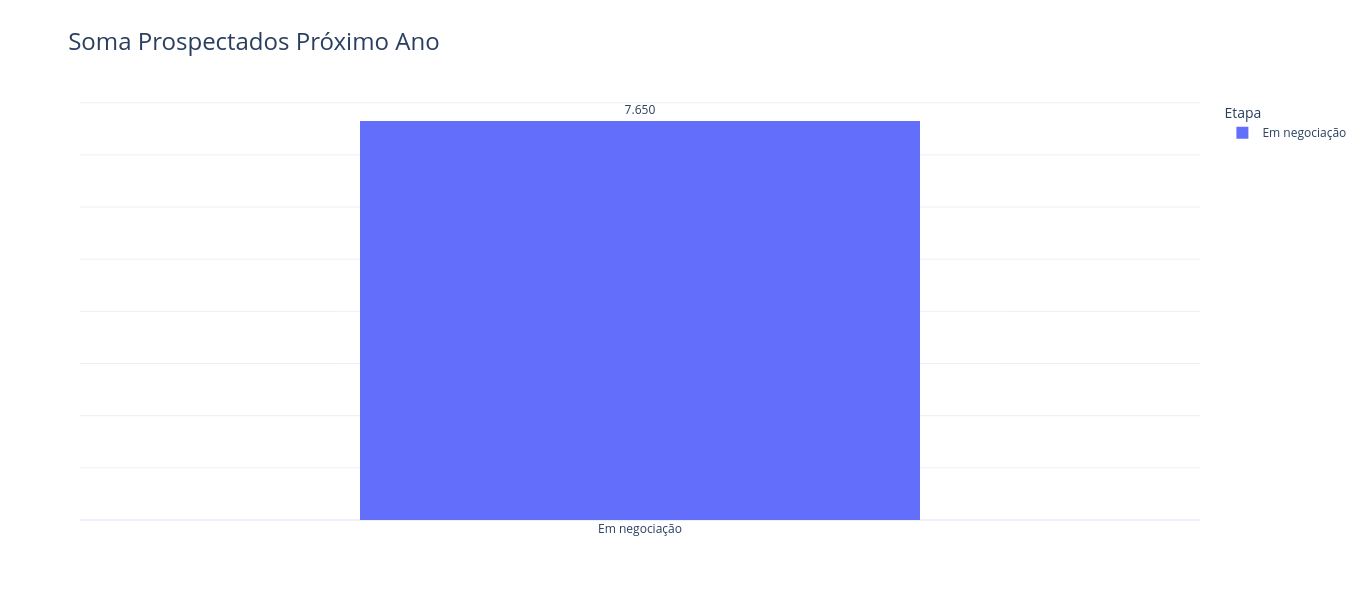

In [185]:
# df_ano_atual.query("data_evento >= '2022/04' and etapa == 'Realizado'")

fig = px.histogram(
    df_fut,
    x='cod_etapa',
    y='valor_total',
    color='etapa',
    text_auto=True,
    title='Soma Prospectados Próximo Ano',
    labels={'etapa': 'Etapa'},
)

fig.update_yaxes(title=None, ticklabelstep=1, showticklabels=False)
fig.update_xaxes(title=None,
                 title_font={'size': 10},
                 title_standoff=10,
                 showticklabels=True)
fig.update_layout(title_font_size=24, bargap=0.5, separators=',.')
fig.update_traces(texttemplate='%{y:,.0f}', textposition='outside')

fig.update_layout()
fig.update_xaxes(ticktext=df_fut.etapa, tickvals=df_fut.cod_etapa)
# fig.update_traces(name= 'etapa', visible=True, selector=dict(type='histogram'))

fig.show()
fig.write_html(r'./graficos/eventos_fut.html')

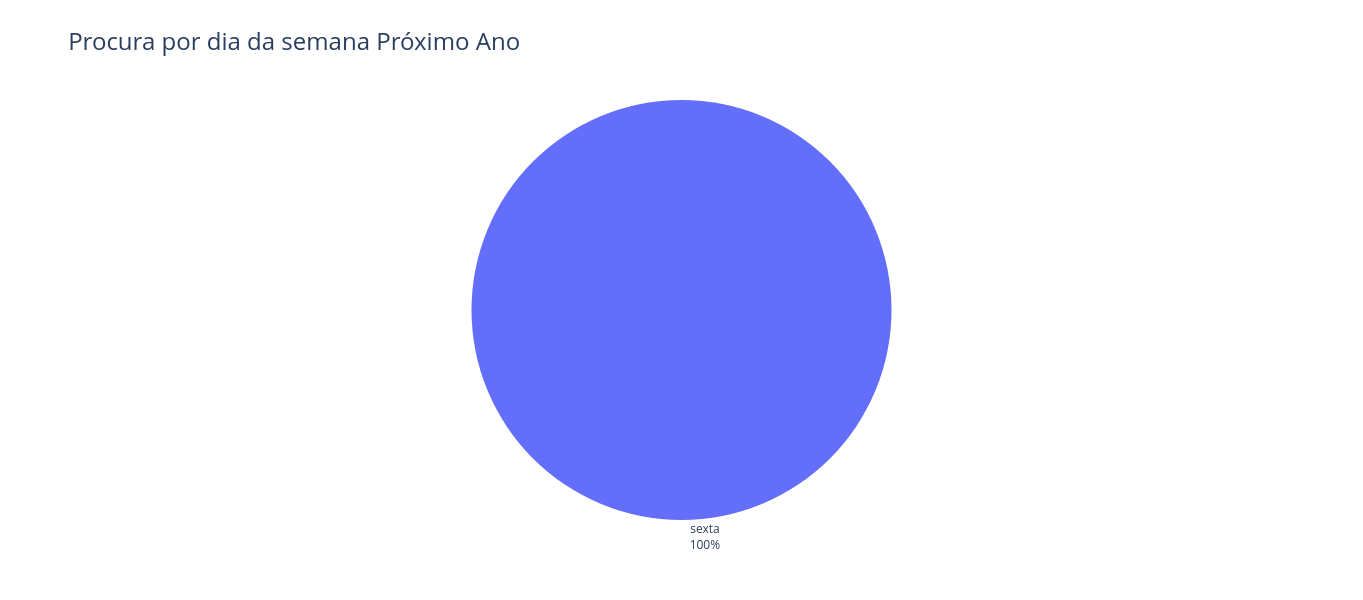

In [186]:
# etapa = df_ano_atual.query('etapa == "Não fechado" or etapa == "Fechado" or etapa == "Realizado"')
fig = px.pie(df_fut, 'dia_semana', title='Procura por dia da semana Próximo Ano')
fig.update_layout(title_font_size=24)
fig.update_traces(textposition='outside', textinfo='percent+label')
# fig.update_layout(title_font_size=24, bargap=0.2)
fig.update_layout(showlegend=False)

fig.show()
fig.write_html(r'./graficos/dist_dia_semana_fut.html')

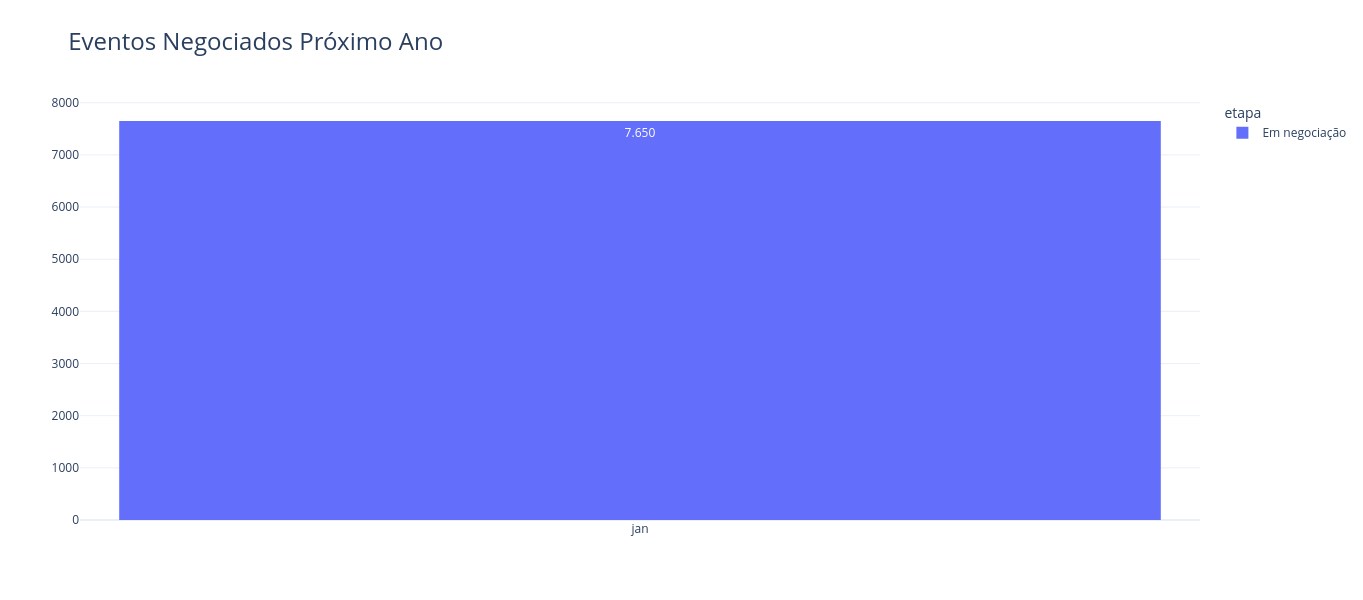

In [187]:
# negociacao = df_ano_atual[(df_ano_atual['etapa'] != 'Realizado') & (df_ano_atual['etapa'] != 'Fechado')]
fig = px.histogram(
    df_fut,
    x='mes_evento',
    y='valor_total',
    text_auto=True,
    title='Eventos Negociados Próximo Ano',
    color='etapa',
    labels={'mes_evento': 'Mês Evento'},
    )

fig.update_yaxes(title=None, ticklabelstep=1, showticklabels=True)
fig.update_xaxes(
    title=None,
    title_standoff=10,
    categoryarray=(
        'jan',
        'fev',
        'mar',
        'abr',
        'mai',
        'jun',
        'jul',
        'ago',
        'set',
        'out',
        'nov',
        'dez',
        ),
    )
fig.update_layout(title_font_size=24, bargap=0.07, separators=',.')
fig.update_traces(texttemplate='%{y:,.0f}')

fig.show()
fig.write_html(r'./graficos/eventos_negociados_fut.html')